In [ ]:
!pip install modal-python

In [ ]:
import modAL
from modAL.uncertainty import uncertainty_sampling,entropy_sampling
import tensorflow as tf
import numpy as np
(Xtrain, ytrain), (Xtest, ytest) = tf.keras.datasets.mnist.load_data()

# Set our RNG seed for reproducibility.
RANDOM_STATE_SEED = 63
np.random.seed(RANDOM_STATE_SEED)

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris


In [ ]:
from copy import deepcopy

# generate the pool
Xpool = deepcopy(Xtrain)
ypool = deepcopy(ytrain)

Xtrain = Xtrain.reshape((Xtrain.shape[0], -1))
Xtest = Xtest.reshape((Xtest.shape[0], -1))
Xpool = Xpool.reshape((Xtrain.shape[0], -1))



n_initial = 100

In [ ]:
# Selecting subset of classes
selected_classes = [0, 1, 2]
pool_class = [0,1,2,4]

# Filtering data based on selected classes
X_train = Xtrain[np.isin(ytrain, selected_classes)]
X_train = X_train.reshape((X_train.shape[0], -1))
y_train = ytrain[np.isin(ytrain, selected_classes)]

X_trainR = Xtrain[np.isin(ytrain, selected_classes)]
X_trainR = X_trainR.reshape((X_trainR.shape[0], -1))
y_trainR = ytrain[np.isin(ytrain, selected_classes)]

X_test = Xtest[np.isin(ytest,pool_class)]
X_test = X_test.reshape((X_test.shape[0], -1))
y_test = ytest[np.isin(ytest,pool_class)]

X_testR = Xtest[np.isin(ytest,pool_class)]
X_testR = X_testR.reshape((X_testR.shape[0], -1))
y_testR = ytest[np.isin(ytest,pool_class)]

# Pool initialization
X_pool = Xpool[np.isin(ypool, pool_class)]
X_pool = X_pool.reshape((X_pool.shape[0], -1))
y_pool = ypool[np.isin(ypool, pool_class)]

X_poolR = Xpool[np.isin(ypool, pool_class)]
X_poolR = X_poolR.reshape((X_poolR.shape[0], -1))
y_poolR = ypool[np.isin(ypool, pool_class)]

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from modAL.models import ActiveLearner, Committee


# initializing Committee members
n_members = 3
learner_list = list()

# initial training data
train_idx = np.random.choice(range(X_train.shape[0]), size=n_initial, replace=False)
X_train = X_train[train_idx]
y_train = y_train[train_idx]

# creating a reduced copy of the data with the known instances removed
X_pool = np.delete(X_pool, train_idx, axis=0)
y_pool = np.delete(y_pool, train_idx)

for member_idx in range(n_members):

    # initializing learner
    learner = ActiveLearner(
        estimator=RandomForestClassifier(),
        query_strategy=uncertainty_sampling,
    )
    #fit learner
    learner.fit(X_train,y_train)

    learner_list.append(learner)

# assembling the committee
committee = Committee(learner_list=learner_list,query_strategy=uncertainty_sampling)

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from modAL.models import ActiveLearner, Committee


# initializing Learner

# creating a reduced copy of the data with the known instances removed
X_poolR = np.delete(X_poolR, train_idx, axis=0)
y_poolR = np.delete(y_poolR, train_idx)

# initializing learner
learnerR = ActiveLearner(
estimator=RandomForestClassifier(),
)
#fit learner
learnerR.fit(X_train,y_train)


AttributeError: 'ActiveLearner' object has no attribute 'bootstrap_init'

AttributeError: 'ActiveLearner' object has no attribute 'bootstrap_init'

AttributeError: 'ActiveLearner' object has no attribute 'bootstrap_init'

In [ ]:
# unqueried_score = committee.score(X_test, y_test)
# with plt.style.context('seaborn-white'):
#     plt.figure(figsize=(7, 7))
#     prediction = committee.predict(X_train)
#     plt.scatter(x = range(1,101), y = prediction, cmap='viridis', s=50)
#     plt.title('Committee initial predictions, accuracy = %1.3f' % unqueried_score)
#     plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

unqueried_score = committee.score(X_test, y_test)
performance_history = [unqueried_score]
accuracy_history = []
n_queries = 40

i = 1
# query by committee
for idx in range(n_queries):
    query_idx, query_instance = committee.query(X_pool)
    committee.teach(
        X=X_pool[query_idx].reshape(1, -1),
        y=y_pool[query_idx].reshape(1, )
    )
        # Calculate accuracy after each query
    accuracy = committee.score(X_test, y_test)
    accuracy_history.append(accuracy)

    # Print or log incremental progress
    print(f"Iteration {i}/{n_queries}: Accuracy = {accuracy:.4f}")

    performance_history.append(committee.score(X_test, y_test))
    # remove queried instance from pool
    X_pool = np.delete(X_pool, query_idx, axis=0)
    y_pool = np.delete(y_pool, query_idx)
    i +=1

Iteration 1/40: Accuracy = 0.7140
Iteration 2/40: Accuracy = 0.7324
Iteration 3/40: Accuracy = 0.7803
Iteration 4/40: Accuracy = 0.8266
Iteration 5/40: Accuracy = 0.8438
Iteration 6/40: Accuracy = 0.8651
Iteration 7/40: Accuracy = 0.8833
Iteration 8/40: Accuracy = 0.8893
Iteration 9/40: Accuracy = 0.8668
Iteration 10/40: Accuracy = 0.8983
Iteration 11/40: Accuracy = 0.8762
Iteration 12/40: Accuracy = 0.8925
Iteration 13/40: Accuracy = 0.8925
Iteration 14/40: Accuracy = 0.8833
Iteration 15/40: Accuracy = 0.8767
Iteration 16/40: Accuracy = 0.8939
Iteration 17/40: Accuracy = 0.9014
Iteration 18/40: Accuracy = 0.8968
Iteration 19/40: Accuracy = 0.8842
Iteration 20/40: Accuracy = 0.8898
Iteration 21/40: Accuracy = 0.9041
Iteration 22/40: Accuracy = 0.9065
Iteration 23/40: Accuracy = 0.9123
Iteration 24/40: Accuracy = 0.9104
Iteration 25/40: Accuracy = 0.9087
Iteration 26/40: Accuracy = 0.9157
Iteration 27/40: Accuracy = 0.9109
Iteration 28/40: Accuracy = 0.9097
Iteration 29/40: Accuracy = 0

In [ ]:
from sklearn.metrics import accuracy_score

unqueried_scoreR = learnerR.score(X_testR, y_testR)
performance_historyR = [unqueried_scoreR]
accuracy_historyR = []
i = 1
# query by committee
for idx in range(n_queries):
    query_idxR= np.random.randint(len(X_poolR), size=(1))
    learnerR.teach(
        X=X_poolR[query_idxR].reshape(1, -1),
        y=y_poolR[query_idxR].reshape(1, )
    )
        # Calculate accuracy after each query
    accuracy = learnerR.score(X_testR, y_testR)
    accuracy_historyR.append(accuracy)

    # Print or log incremental progress
    print(f"Iteration {i}/{n_queries}: Accuracy = {accuracy:.4f}")

    performance_historyR.append(learnerR.score(X_testR, y_testR))
    # remove queried instance from pool
    X_poolR = np.delete(X_poolR, query_idxR, axis=0)
    y_poolR = np.delete(y_poolR, query_idxR)
    i +=1

Iteration 1/40: Accuracy = 0.7050
Iteration 2/40: Accuracy = 0.7099
Iteration 3/40: Accuracy = 0.7108
Iteration 4/40: Accuracy = 0.7033
Iteration 5/40: Accuracy = 0.7145
Iteration 6/40: Accuracy = 0.7099
Iteration 7/40: Accuracy = 0.7079
Iteration 8/40: Accuracy = 0.6990
Iteration 9/40: Accuracy = 0.7135
Iteration 10/40: Accuracy = 0.7070
Iteration 11/40: Accuracy = 0.7239
Iteration 12/40: Accuracy = 0.7208
Iteration 13/40: Accuracy = 0.7166
Iteration 14/40: Accuracy = 0.7200
Iteration 15/40: Accuracy = 0.7164
Iteration 16/40: Accuracy = 0.7116
Iteration 17/40: Accuracy = 0.7203
Iteration 18/40: Accuracy = 0.7258
Iteration 19/40: Accuracy = 0.7275
Iteration 20/40: Accuracy = 0.7336
Iteration 21/40: Accuracy = 0.7418
Iteration 22/40: Accuracy = 0.7442
Iteration 23/40: Accuracy = 0.7433
Iteration 24/40: Accuracy = 0.7692
Iteration 25/40: Accuracy = 0.7944
Iteration 26/40: Accuracy = 0.8029
Iteration 27/40: Accuracy = 0.7883
Iteration 28/40: Accuracy = 0.8072
Iteration 29/40: Accuracy = 0

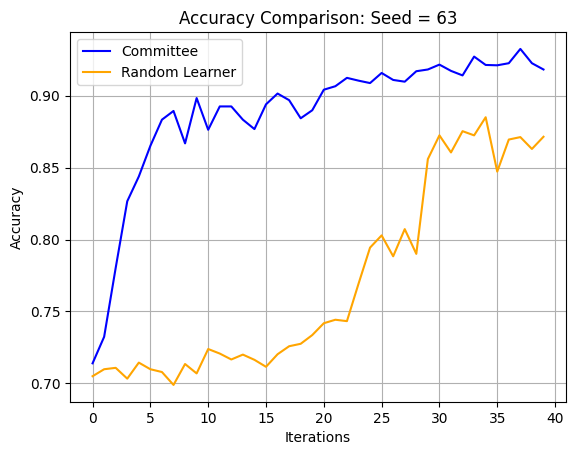

In [ ]:
plt.figure(1)
iterations = np.arange(idx+1)
plt.plot(iterations, accuracy_history, label='Committee', color='blue')
plt.plot(iterations, accuracy_historyR, label='Random Learner', color='orange')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: Seed = '+str(RANDOM_STATE_SEED))
plt.legend()
plt.grid(True)
plt.show()